import data

In [420]:
import pandas as pd    
import numpy as np

In [421]:
df = pd.read_excel('dataset_penjualan.xlsx')

In [422]:
df.head()

,ID transaksi,beras,telur,tepung,migor,gula
0,T1,1,1,0,0,0
1,T2,1,0,1,1,0
2,T3,1,1,0,0,1
3,T4,1,1,0,1,0
4,T5,1,1,0,0,0


In [423]:
columns_to_drop = ['ID transaksi']
df = df.drop(columns=columns_to_drop)
print("dataframe setelah di drop")
print(df.head())

dataframe setelah di drop
   beras  telur  tepung  migor  gula
0      1      1       0      0     0
1      1      0       1      1     0
2      1      1       0      0     1
3      1      1       0      1     0
4      1      1       0      0     0


In [424]:
missing_value = df.isnull().sum()
print(missing_value)

if missing_value.sum() > 0:
    print("Ada Missing Value")
else:
    print("Tidak Ada Missing Value")

beras     0
telur     0
tepung    0
migor     0
gula      0
dtype: int64
Tidak Ada Missing Value


In [425]:
from sklearn.preprocessing import minmax_scale, StandardScaler
scaler = StandardScaler()


Normalisasi Data

In [426]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("data setelah di normalisasi")
print(df.head())


data setelah di normalisasi
   beras  telur  tepung  migor  gula
0    1.0    1.0     0.0    0.0   0.0
1    1.0    0.0     1.0    1.0   0.0
2    1.0    1.0     0.0    0.0   1.0
3    1.0    1.0     0.0    1.0   0.0
4    1.0    1.0     0.0    0.0   0.0


find optimal support with elbow

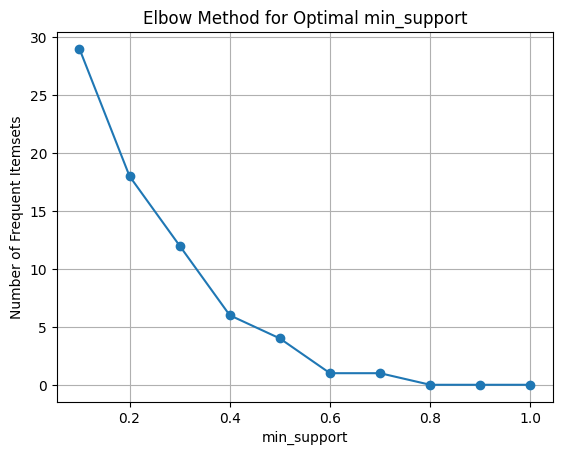

In [427]:
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori

support_values = [x * 0.1 for x in range(1, 11)]  # Nilai support dari 0.1 hingga 1.0
itemsets_count = []  # List untuk menyimpan jumlah itemsets

# Melakukan percobaan untuk setiap nilai support
for support in support_values:
    # Mencari frequent itemsets
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    
    # Menyimpan jumlah itemsets untuk nilai support saat ini
    itemsets_count.append(len(frequent_itemsets))

# Plot Elbow Curve
plt.plot(support_values, itemsets_count, marker='o')
plt.title('Elbow Method for Optimal min_support')
plt.xlabel('min_support')
plt.ylabel('Number of Frequent Itemsets')
plt.grid(True)
plt.show()

find value optmimal confident

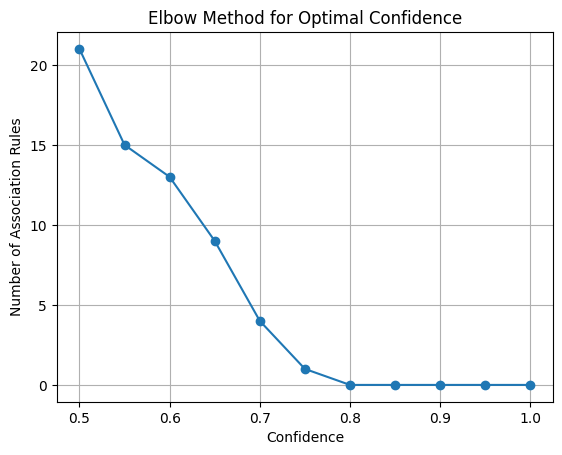

In [428]:
from mlxtend.frequent_patterns import association_rules

min_support_value = 0.2
frequent_itemsets = apriori(df, min_support=min_support_value, use_colnames=True)

# Daftar nilai confidence yang akan dicoba
confidence_values = [x * 0.05 for x in range(10, 21)]  # Nilai confidence dari 0.5 hingga 1.0
rules_count = []  # List untuk menyimpan jumlah aturan asosiasi

# Melakukan percobaan untuk setiap nilai confidence
for confidence in confidence_values:
    # Menghitung association rules untuk setiap nilai confidence
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    
    # Menyimpan jumlah aturan asosiasi untuk nilai confidence saat ini
    rules_count.append(len(rules))

# Plot Elbow Curve untuk Confidence
plt.plot(confidence_values, rules_count, marker='o')
plt.title('Elbow Method for Optimal Confidence')
plt.xlabel('Confidence')
plt.ylabel('Number of Association Rules')
plt.grid(True)
plt.show()

In [429]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemset_apriori = apriori(df, min_support=0.2, use_colnames=True)

rules_apriori = association_rules(frequent_itemset_apriori, metric="confidence", min_threshold=0.7)
print("frequent itemset apriori")
print(frequent_itemset_apriori)
print("\nAturan asosiasi apriori")
print(rules_apriori)

frequent itemset apriori
     support                itemsets
0   0.740000                 (beras)
1   0.580000                 (telur)
2   0.466667                (tepung)
3   0.546667                 (migor)
4   0.566667                  (gula)
5   0.446667          (beras, telur)
6   0.326667         (beras, tepung)
7   0.366667          (migor, beras)
8   0.393333           (beras, gula)
9   0.213333         (telur, tepung)
10  0.306667          (migor, telur)
11  0.306667           (telur, gula)
12  0.333333         (migor, tepung)
13  0.240000          (gula, tepung)
14  0.266667           (migor, gula)
15  0.226667   (migor, beras, telur)
16  0.220000    (beras, telur, gula)
17  0.220000  (migor, beras, tepung)

Aturan asosiasi apriori
      antecedents consequents  antecedent support  consequent support  \
0         (telur)     (beras)            0.580000            0.740000   
1        (tepung)     (beras)            0.466667            0.740000   
2        (tepung)     (migor

In [430]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.2, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.7)

print("frequents itemset fpgrowth")
print(frequent_itemsets_fpgrowth)
print("\nAturan asosiasi fpgrowth")
print(rules_fpgrowth)

frequents itemset fpgrowth
     support                itemsets
0   0.740000                 (beras)
1   0.580000                 (telur)
2   0.546667                 (migor)
3   0.466667                (tepung)
4   0.566667                  (gula)
5   0.446667          (beras, telur)
6   0.366667          (migor, beras)
7   0.306667          (migor, telur)
8   0.266667           (migor, gula)
9   0.226667   (migor, beras, telur)
10  0.333333         (migor, tepung)
11  0.326667         (beras, tepung)
12  0.213333         (telur, tepung)
13  0.240000          (gula, tepung)
14  0.220000  (migor, beras, tepung)
15  0.393333           (beras, gula)
16  0.306667           (telur, gula)
17  0.220000    (beras, telur, gula)

Aturan asosiasi fpgrowth
      antecedents consequents  antecedent support  consequent support  \
0         (telur)     (beras)            0.580000            0.740000   
1  (migor, telur)     (beras)            0.306667            0.740000   
2        (tepung)     (mi

In [431]:
import time 
start = time.time()
frequent_itemset_apriori = apriori(df, min_support=0.2, use_colnames=True)
apriori_time = time.time() - start

start = time.time()
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.2, use_colnames=True)
fpgrowth_time = time.time() - start

print(f"apriori time : {apriori_time} seccond")
print(f"fpgrowth time : {fpgrowth_time} seccond")

apriori time : 0.0060100555419921875 seccond
fpgrowth time : 0.0032300949096679688 seccond


In [432]:
rules_apriori = association_rules(frequent_itemset_apriori, metric="confidence", min_threshold=0.7)
apriori_rules_count = len(rules_apriori)

rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.7)
fpgrowth_rules_count = len(rules_fpgrowth)

print(f"apriori rules count : {apriori_rules_count}")
print(f"fpgrowth rules count : {fpgrowth_rules_count}")

apriori rules count : 5
fpgrowth rules count : 5


In [433]:
apriori_quality = rules_apriori[['support', 'confidence', 'lift']]
fpgrowth_quality = rules_fpgrowth[['support', 'confidence', 'lift']]

print(f"apriori quality : {apriori_quality}")
print(f"fpgrowth quality : {fpgrowth_quality}")

apriori quality :     support  confidence      lift
0  0.446667    0.770115  1.040696
1  0.326667    0.700000  0.945946
2  0.333333    0.714286  1.306620
3  0.226667    0.739130  0.998825
4  0.220000    0.717391  0.969448
fpgrowth quality :     support  confidence      lift
0  0.446667    0.770115  1.040696
1  0.226667    0.739130  0.998825
2  0.333333    0.714286  1.306620
3  0.326667    0.700000  0.945946
4  0.220000    0.717391  0.969448
